<a href="https://colab.research.google.com/github/Arqamansari23/NLP/blob/main/Sentiment_Analysis_with_DistilBERT_using_Hugging_Face_%7C_NLP_with_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with DistilBERT using Hugging Face | NLP with Hugging Face**

# **DistilBERT**



*   The IMDB dataset contains 25,000 movie reviews labeled by sentiment for training a model and 25,000 movie reviews for testing it.
*   DistilBERT is a smaller, faster and cheaper version of BERT. It has 40% smaller than BERT and runs 60% faster while preserving over 95% of BERT’s performance.



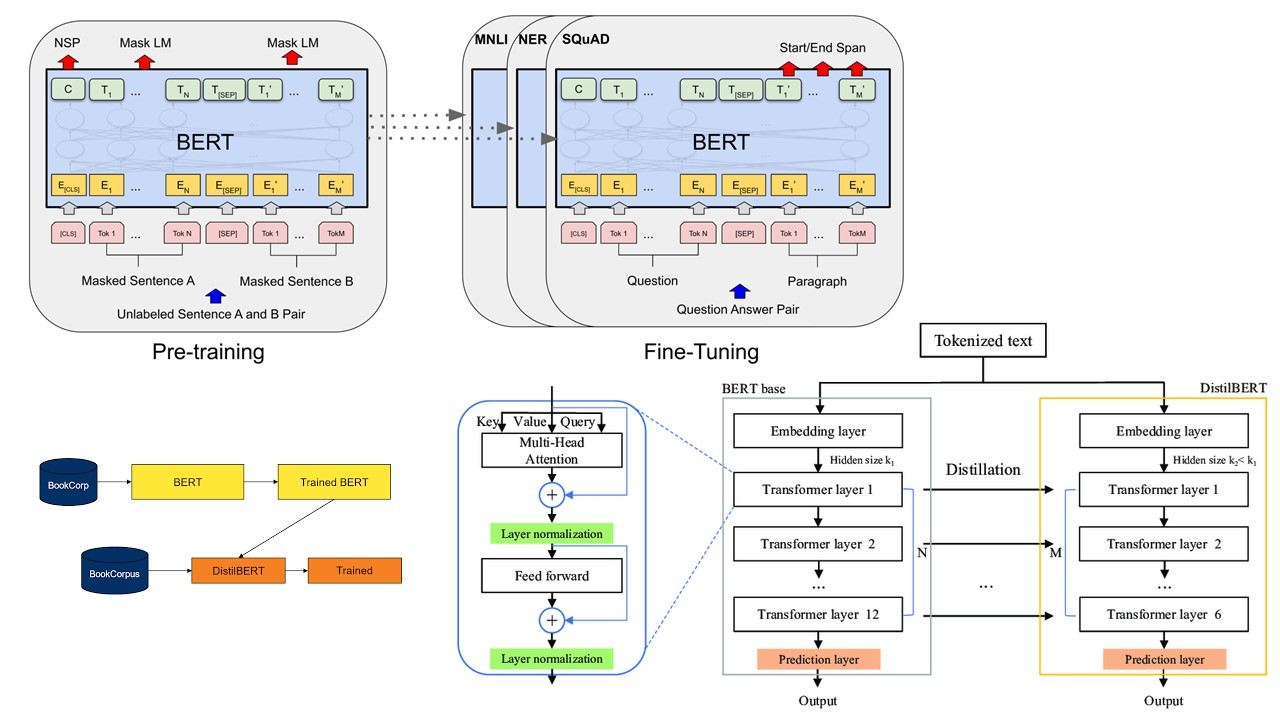


**Introduction to DistilBERT**: DistilBERT, short for "Distill and BERT," is a compact version of the renowned BERT (Bidirectional Encoder Representations from Transformers) model.

**Model Architecture**: It reduces the number of layers and attention heads, resulting in a smaller and faster model.

**Parameter Reduction**: One of DistilBERT's key features is its parameter reduction strategy, achieved by distillation. This involves training the model on a combination of teacher (BERT) and student (DistilBERT).

**Efficiency and Speed**: By reducing the model's size and complexity, DistilBERT achieves a significant speedup during both training and



# Importing Libraries

In [1]:

!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.

In [2]:

!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall   # for text preprocessing automated code

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-e4p4exnj
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-e4p4exnj
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8175 sha256=4c1c4fd4087a01e1772a1a29a1ab43478ce82bf1f21b21f2d0c1ea4b44477e67
  Stored in dir

# Pretrained Model

In [3]:
# sentiment analysis with the pipeline
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

data = ['i love you', 'i hate you']
sentiment_pipeline(data)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

# **Fine Tunning DistilBERT On Custom Data**

### Downloading the IMDB(Movie) Data From GitHib

In [4]:
! pip install requests rarfile pandas
! pip install rarfile
import requests

url = "https://github.com/Arqamansari23/Data/raw/main/IMDB-Dataset.rar"
response = requests.get(url)

with open("IMDB-Dataset.rar", "wb") as file:
    file.write(response.content)
    import rarfile

# Open the RAR file
with rarfile.RarFile("IMDB-Dataset.rar") as rf:
    rf.extractall("IMDB_Dataset")

import rarfile

# Open the RAR file
with rarfile.RarFile("IMDB-Dataset.rar") as rf:
    rf.extractall("IMDB_Dataset")

import pandas as pd

# Replace 'IMDB_Dataset.csv' with the actual name of the extracted file
df = pd.read_csv("IMDB_Dataset/IMDB-Dataset.csv")

# Display the first few rows of the DataFrame






In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df=df.sample(10000)    # taking 10000 sample as data is quite Huge

# Data Preprocessing

In [8]:
! pip install googletrans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=bdd77174fde62a935db8d9605541b21888214f2704a25e1ecddb7ab04c2e41f8
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
   

In [9]:
df.shape

(10000, 2)

### Checking Missing values

In [10]:
df.isnull().sum()

,0
review,0
sentiment,0


### Creating New Features

In [11]:
# preprocessing
df['word_counts'] = df['review'].apply(lambda x: ps.word_count(x))
df['char_counts'] = df['review'].apply(lambda x: ps.char_count(x))
df['avg_wordlength'] = df['review'].apply(lambda x: ps.avg_word_len(x))
df['stopwords_counts'] = df['review'].apply(lambda x: ps.stop_words_count(x))

In [12]:
df.head()

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts
22570,Someone should tell Goldie Hawn that her caree...,negative,118,530,4.491525,63
22234,I saw this in the summer of 1990. I'm still an...,negative,43,183,4.255814,22
49361,"I absolutely hate this programme, what kind of...",negative,122,528,4.327869,64
3695,"Not many people remember ""The Carey Treatment""...",negative,134,683,5.097015,60
26738,I have read a lot of books in my short lifetim...,negative,651,2856,4.387097,314


### Removing HTML Tags

In [13]:

df.head()

df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/text_preprocess.py:92: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text()


# Data Analysis

<Axes: >

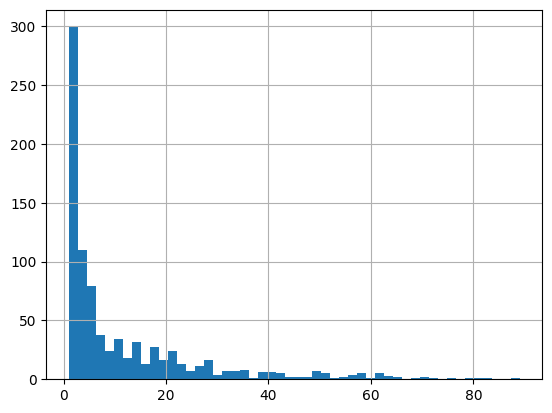

In [14]:
df['word_counts'].value_counts().hist(bins=50)

# **Data Preparation For Model**

In [15]:

# custom dataset -> evaluation/compute metrics -> training arguments -> trainer -> training -> testing

In [16]:

import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [17]:
df

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts
22570,someone should tell goldie hawn that her caree...,negative,118,530,4.491525,63
22234,i saw this in the summer of 1990. i'm still an...,negative,43,183,4.255814,22
49361,"i absolutely hate this programme, what kind of...",negative,122,528,4.327869,64
3695,"not many people remember ""the carey treatment""...",negative,134,683,5.097015,60
26738,i have read a lot of books in my short lifetim...,negative,651,2856,4.387097,314
...,...,...,...,...,...,...
18867,...but a lousy film. as maltin says this was c...,negative,120,592,4.933333,59
39117,where the heck is andreas(trond fausa aurvaag)...,positive,918,4606,5.017429,425
32892,this movie is a great attempt towards the revi...,positive,112,528,4.714286,58
28707,i feel much less generous with this film than ...,negative,142,634,4.464789,90


### Function For Generating Tokens For Our Custom Data set

In [18]:
# the function accepts text and labels ,the Model tokanizer and MAx lenght of tokens




class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])   # text from data
    label = torch.tensor(self.labels[idx])  # labels form data in tensor format

    encoding = self.tokenizer(text, truncation=True, padding="max_length",    # making Tokens of data
                              max_length=self.max_len)


    # returning input id , attention mask and labels from encoded data
    return {
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask'],
        'labels': label
    }


# prepare tokenizer and model

In [19]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = 'distilbert-base-uncased'
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2).to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Preparing X and Y variables

In [21]:
df.head(1)

,review,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts
22570,someone should tell goldie hawn that her caree...,negative,118,530,4.491525,63


In [25]:
df['review'].tolist()

['someone should tell goldie hawn that her career as a teen-age gamin ended thirty years ago. this is one of the worst films released in years, an unequivocal disaster in which the two leads give themselves over to a frenetic exposition of their trademark tics in an effort to make up for a bad script and bad directing. this thing should have been smothered at birth.i hope john cleese got paid a lot for having his name attached to this disaster. he is the only performer who came through this stinking mess more or less unscathed, his only fault being a failure to realize that the rest of the cast would sink the picture.',
 "i saw this in the summer of 1990. i'm still annoyed by how bad this movie is in 2001.implausible plot. you'd have to be a child to think this could happen.i'm just really annoyed by it. don't see this.",
 "i absolutely hate this programme, what kind of people sit and watch this garbage?? ok my dad and mum love it lol but i make sure i'm well out of the room before it 

In [26]:
X=df['review'].tolist()

In [27]:
label2id = {'positive': 1, 'negative': 0}
id2label = {1: 'positive', 0: 'negative'}

In [29]:
df['sentiment'].map(label2id)

,sentiment
22570,0
22234,0
49361,0
3695,0
26738,0
...,...
18867,0
39117,1
32892,1
28707,0


In [30]:
df['sentiment'].map(label2id).tolist()

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [31]:
y=df['sentiment'].map(label2id).tolist()

# Making The Dataset

In [32]:
dataset = CustomDataset(X, y, tokenizer)

In [33]:
dataset

In [36]:
dataset[0]   # First row of data set having Tokens as Input ids , attention mask and Labels as tensor format

{'input_ids': [101,
  2619,
  2323,
  2425,
  2751,
  2666,
  5292,
  7962,
  2008,
  2014,
  2476,
  2004,
  1037,
  9458,
  1011,
  2287,
  11721,
  10020,
  3092,
  4228,
  2086,
  3283,
  1012,
  2023,
  2003,
  2028,
  1997,
  1996,
  5409,
  3152,
  2207,
  1999,
  2086,
  1010,
  2019,
  16655,
  15549,
  6767,
  9289,
  7071,
  1999,
  2029,
  1996,
  2048,
  5260,
  2507,
  3209,
  2058,
  2000,
  1037,
  10424,
  8625,
  4588,
  13080,
  1997,
  2037,
  11749,
  14841,
  6169,
  1999,
  2019,
  3947,
  2000,
  2191,
  2039,
  2005,
  1037,
  2919,
  5896,
  1998,
  2919,
  9855,
  1012,
  2023,
  2518,
  2323,
  2031,
  2042,
  15488,
  14573,
  6850,
  2012,
  4182,
  1012,
  1045,
  3246,
  2198,
  18856,
  10285,
  2063,
  2288,
  3825,
  1037,
  2843,
  2005,
  2383,
  2010,
  2171,
  4987,
  2000,
  2023,
  7071,
  1012,
  2002,
  2003,
  1996,
  2069,
  9256,
  2040,
  2234,
  2083,
  2023,
  27136,
  2075,
  6752,
  2062,
  2030,
  2625,
  4895,
  15782,
  23816,
  101

In [37]:
dataset[0].keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

# performance Matrices

In [38]:

from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(example):
  labels = example.label_ids
  preds = example.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")   # weighted because it cares of imbalanced data
  acc = accuracy_score(labels, preds)

  return {'accuracy': acc, "f1": f1}


# Train Test Split The data

In [39]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Model Arguments

In [40]:

from transformers import Trainer, TrainingArguments
batch_size = 16
model_name = "distilbert_finetuned_setiment"

args = TrainingArguments(
    output_dir = "output",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size = batch_size,
    learning_rate = 2e-5,
    num_train_epochs = 1,
    evaluation_strategy = 'epoch'
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# Initializing Model Trainer

In [41]:

trainer = Trainer(model=model,
                  args=args,
                  train_dataset = train_dataset,
                  eval_dataset = test_dataset,
                  compute_metrics=compute_metrics,
                  tokenizer = tokenizer)

# Training The Model

In [42]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.303200,0.226298,0.911000,0.910990


TrainOutput(global_step=500, training_loss=0.30324908447265625, metrics={'train_runtime': 411.9023, 'train_samples_per_second': 19.422, 'train_steps_per_second': 1.214, 'total_flos': 1059739189248000.0, 'train_loss': 0.30324908447265625, 'epoch': 1.0})

# Model Testing

### Method -1

In [44]:
trainer.save_model(model_name)   # saving the model

In [45]:
text = "i love this product"
pipe = pipeline('text-classification', model_name)
pipe(text)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.9517835378646851}]

### Method -2

In [46]:

# loading Model and Tokanizer

tok = AutoTokenizer.from_pretrained(model_name)
mod = AutoModelForSequenceClassification.from_pretrained(model_name)

In [47]:

def get_prediction(text):
  input_ids = tok.encode(text, return_tensors='pt')
  output = mod(input_ids)

  preds = torch.nn.functional.softmax(output.logits, dim=-1)

  prob = torch.max(preds).item()

  idx = torch.argmax(preds).item()
  sentiment = id2label[idx]

  return {'sentiment':sentiment, 'prob':prob}

In [48]:
text = "i love this product"
get_prediction(text)


{'sentiment': 'positive', 'prob': 0.9517835378646851}

In [49]:

text = "i hate this product"
get_prediction(text)

{'sentiment': 'negative', 'prob': 0.8555787801742554}

# Example

In [ ]:
text = "i love this product"

input_ids = tok.encode(text, return_tensors='pt')
output = mod(input_ids)

In [ ]:
output.logits   # These Logits Must be Converted into Proberbility

In [ ]:
preds = torch.nn.functional.softmax(output.logits, dim=-1)